In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

import numpy as np

<Figure size 432x288 with 0 Axes>

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index,test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [5]:
from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression()
clf = LogisticRegression(solver='liblinear')

In [6]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

In [7]:
clf.C = 1e-3
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9385964912280702

In [8]:
clf

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train,y_train)
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [11]:
X_test_value = clf.decision_function(X_test)

In [12]:
X_test_value

array([ -4.86949381,   3.47360672,   6.17342832,   1.4991235 ,
         9.46695745,   5.83581213,   4.92708239,   6.42805882,
         3.34235999,   8.49598196,   0.4451427 ,   1.6707277 ,
         5.52818357,  -1.17838919,   1.40592943,  -4.75083899,
         4.19042705, -20.34031334,  -6.46694672, -26.8167844 ,
       -10.34698299,  -2.32727646,   6.41062445,   4.50292015,
        -4.92303047,   4.57558987,   6.30052034,  -1.54847404,
         5.74269377, -24.13060341,   7.96277666, -17.83737966,
         0.54395556,  -7.54450495,   8.59084971,  -6.53076255,
         2.50408882, -13.19474572,   5.48070697,  -7.9842541 ,
        -2.84324872,   5.47577469,  -6.17854739,   7.05459584,
        -2.64124711, -27.8031272 ,   8.12575587,   3.54512464,
         6.74076189,  -8.04432154, -12.53182726,  -0.696383  ,
       -14.80907852,   5.45698838,   4.77252767,   6.99104758,
         4.20887083,   3.7592299 ,   4.08132293, -38.66492002,
        -4.19220741,  -9.87968889,   6.18339791,   5.36

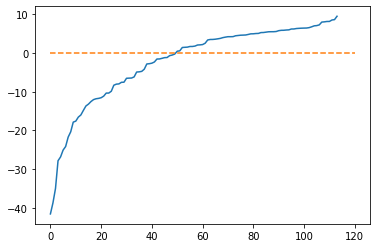

In [13]:
plt.plot(np.sort(X_test_value))
plt.plot([0,120], [0,0], linestyle='--')

(0, 1)

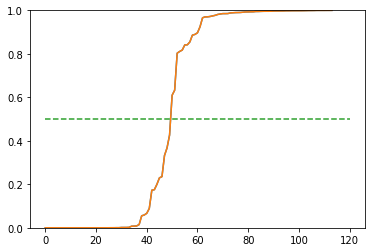

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

plt.plot(np.sort(sigmoid(X_test_value)))

plt.plot(np.sort(sigmoid(X_test_value)))

plt.plot([0,120],[0.5,0.5],linestyle='--')
plt.ylim(0,1)

In [16]:
from sklearn.datasets import make_blobs

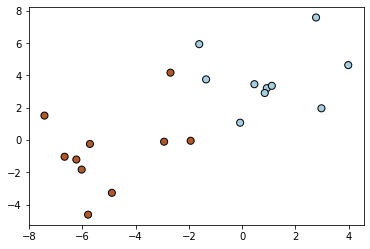

In [21]:
X,y = make_blobs(n_samples=20,
                n_features=2,
                centers=2,
                cluster_std = 2,
                random_state=3
                )
plt.scatter(X[:, 0],X[:, 1],c=y,s=50,edgecolors='k');

In [23]:
def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: # 'value', 'probability'
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            if type == "probability":
                Z = 1 / (1 + np.exp(-Z)) # sigmoid
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1])

    if boundary:
        level = [0.5]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


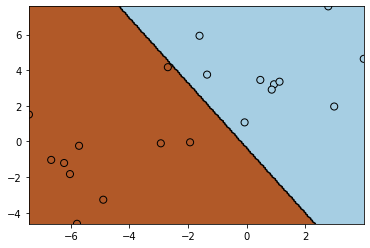

In [24]:
clf = LogisticRegression()

clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y,edgecolors='k')
plotBoundary(X, clf)

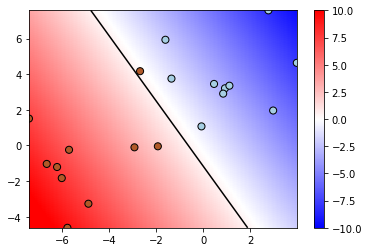

In [25]:
plt.scatter(X[:, 0], X[:, 1],marker='o',s=50,c=y,edgecolors='k')
plotBoundary(X,clf,type="value", clim=(-10,10))

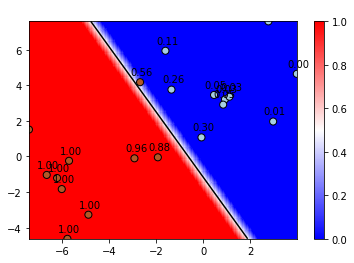

In [26]:
plt.scatter(X[:, 0], X[:, 1],marker='o',s=50,c=y,edgecolors='k')
plotBoundary(X,clf,type="probablity", clim=(0,1))

X_value = clf.decision_function(X)

for l,dx,dy in zip(X_value, X[:,0],X[:,1]):
    plt.annotate("{0:.2f}".format(sigmoid(l)), xy=(dx-0.4, dy+0.4))

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


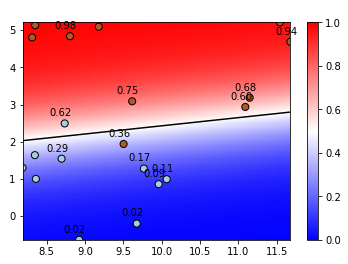

In [27]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )

clf = LogisticRegression()

clf.fit(X,y)
   
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

X_value = clf.decision_function(X)

plotBoundary(X, clf, type="probability", clim=(0, 1))

for l,dx,dy in zip(X_value, X[:,0],X[:,1]):
    plt.annotate("{0:.2f}".format(sigmoid(l)), xy=(dx-0.2, dy+0.2))